In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('eachgene_r2.txt',delimiter='\t')
df.set_index("sample",inplace=True)
df

,pred growth,pred thr,production growth,production thr,actual growth,actual thr,ratio growth,ratio thr,strain,add,delete
sample,,,,,,,,,,,
7_0_TA1_C_asdO_aspC_DlysC_I_24_M1,0.073206,0.180033,0.08,0.00000,0.001467,0.000000,49.913237,inf,7,aspC,DlysC
7_0_TA1_C_asdO_aspC_DptsG_I_24_M1,0.000000,0.004321,0.45,0.00000,0.008250,0.000000,0.000000,inf,7,aspC,DptsG
7_0_TA1_C_asdO_aceBA_DptsG_I_24_M1,0.057333,0.151927,1.03,0.00000,0.018883,0.000000,3.036175,inf,7,aceBA,DptsG
7_0_TA1_C_asdO_zwf_DptsG_I_24_M1,0.038442,0.157102,5.22,0.00000,0.095700,0.000000,0.401688,inf,7,zwf,DptsG
7_0_TA1_C_asdO_rhtA_DtdhDrhtA_I_24_M1,0.062129,0.136026,5.75,0.00000,0.105417,0.000000,0.589365,inf,7,rhtA,DtdhDrhtA
...,...,...,...,...,...,...,...,...,...,...,...
7_0_TA1_C_asdT_pntAB_D000_I_24_M1,0.049985,0.301082,3.83,1.04675,0.070217,0.217304,0.711865,1.385531,7,pntAB,D000
7_0_TA1_C_asdT_000_Dtdh_I_24_M1,0.069999,0.239985,6.79,1.86000,0.124483,0.217805,0.562314,1.101837,7,0,Dtdh
7_0_TA1_C_asdT_000_D000_I_24_M1,0.070000,0.240000,3.66,1.10750,0.067100,0.240595,1.043219,0.997526,7,0,D000


In [29]:
gene_list=(
 'lysA',
 'rhtA',
 'ptsG',
 'lysC',
 'pyc',
 'ppc',
 'zwf',
 'pntAB',
 'aceBA', 
 'aspC',
 'tdh',
 'dhaM'
)

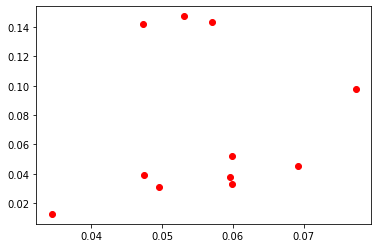

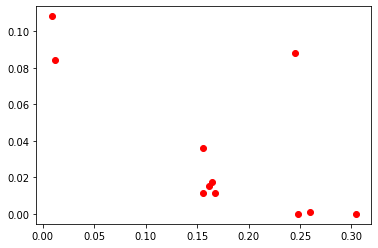

lysA -0.07605989513872013 -21.62791317209895 11


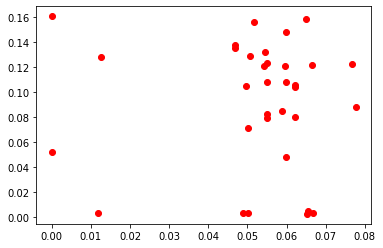

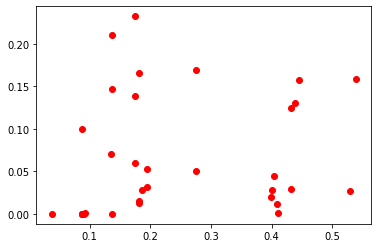

rhtA -0.7964570644811746 -10.552928533384032 33


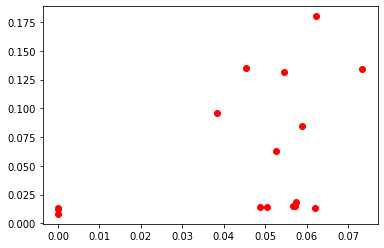

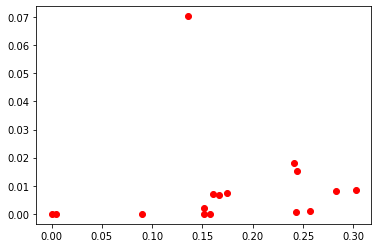

ptsG 0.11416276830085093 -121.59611702664263 16


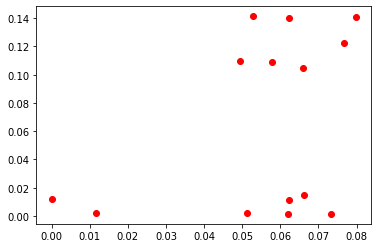

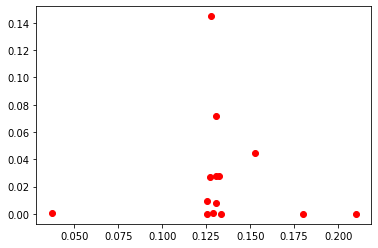

lysC 0.12185856485101365 -8.612761093866103 14


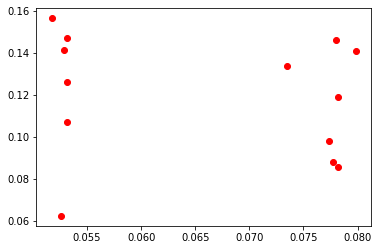

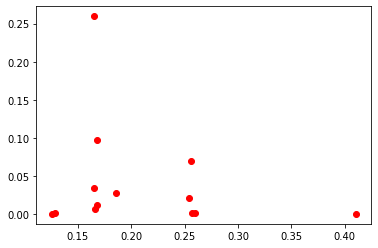

pyc -4.0337519533399115 -7.442677102883566 13


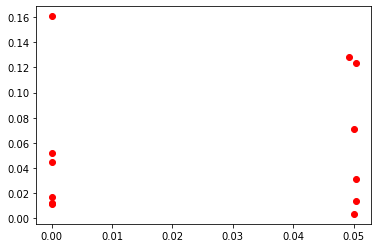

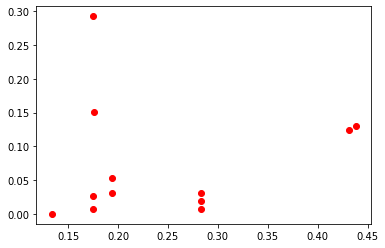

ppc -0.4874335528907463 -5.3376966183261505 12


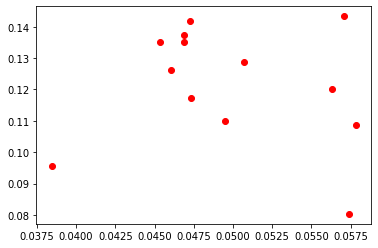

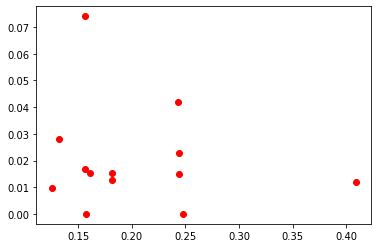

zwf -15.83293796206626 -111.21383050200161 13


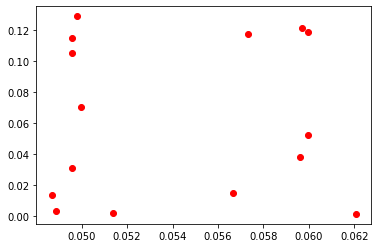

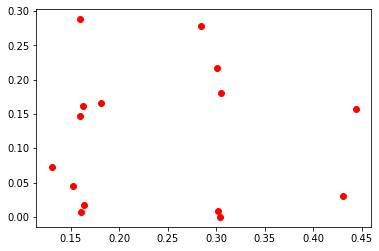

pntAB -0.02909933493561412 -2.7628107352759512 15


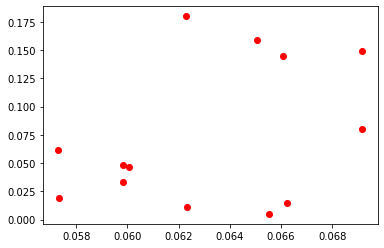

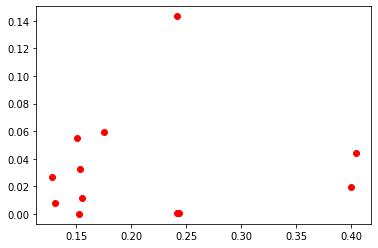

aceBA 0.016955223427958965 -28.770152669845643 13


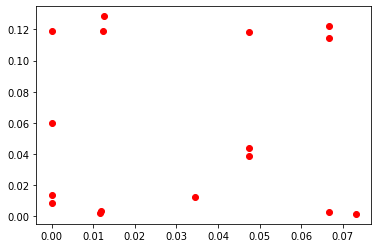

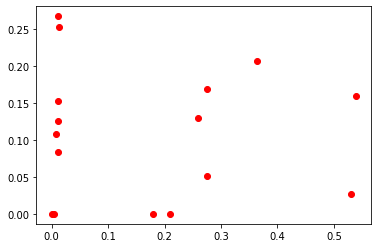

aspC -0.4741999489561959 -5.104146132223925 16


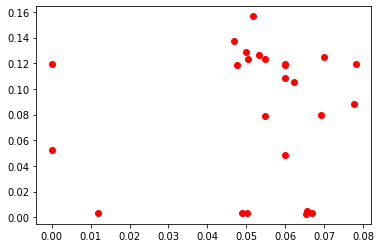

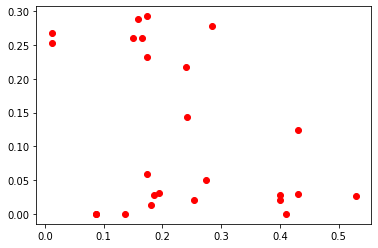

tdh -0.467331675949308 -3.266351455229475 25


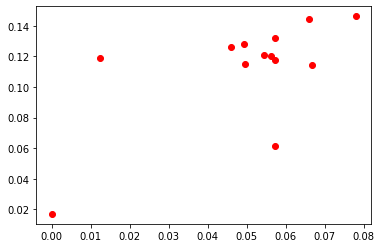

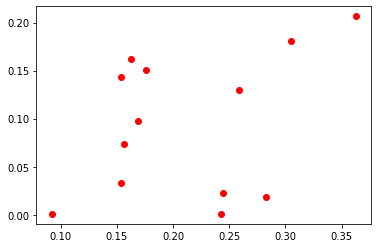

dhaM -2.977146271155564 -3.2099245817621247 13


In [39]:
for gene in gene_list:
    growth_pred=[]
    growth_true=[]
    thr_pred=[]
    thr_true=[]
    for sample in df.index:
        if gene in sample:
            growth_pred.append(df.loc[sample,'pred growth'])
            growth_true.append(df.loc[sample,'actual growth'])
            thr_pred.append(df.loc[sample,'pred thr'])
            thr_true.append(df.loc[sample,'actual thr'])

    growth_r2= r2_score(growth_true,growth_pred)
    thr_r2= r2_score(thr_true,thr_pred)
    plt.figure()
    plt.plot(growth_pred,growth_true, 'ro')
    plt.show()
    plt.figure()
    plt.plot(thr_pred,thr_true, 'ro')
    plt.show()
    print (gene, growth_r2,thr_r2, len(growth_true))


In [53]:
for ind in df.index:
    if "zwf" in ind or "ptsG" in ind or "aceBA" in ind or "lysA" in ind or "rhtA" in ind:
        df.drop([ind], inplace=True)
df

,pred growth,pred thr,production growth,production thr,actual growth,actual thr,ratio growth,ratio thr,strain,add,delete
sample,,,,,,,,,,,
7_0_TA1_C_asdO_aspC_DlysC_I_24_M1,0.073206,0.180033,0.08,0.00000,0.001467,0.000000,49.913237,inf,7,aspC,DlysC
7_0_TA1_C_asdO_pyc_DlysC_I_24_M1,0.079864,0.125664,7.68,0.00200,0.140800,0.000207,0.567217,606.902208,7,pyc,DlysC
7_0_TA1_C_asdO_ppc_D000_I_24_M1,0.050405,0.174495,1.71,0.05775,0.031350,0.026852,1.607815,6.498353,7,ppc,D000
7_0_TA1_C_asdO_000_DlysC_I_24_M1,0.062313,0.130425,7.65,0.26700,0.140250,0.027751,0.444301,4.699879,7,0,DlysC
7_0_TA1_C_asdO_pyc_D000_I_24_M1,0.078174,0.164872,4.69,0.19950,0.085983,0.033822,0.909174,4.874751,7,pyc,D000
7_0_TA1_C_asdO_pntAB_DlysC_I_24_M1,0.062070,0.130565,0.08,0.00725,0.001467,0.072056,42.320348,1.811978,7,pntAB,DlysC
7_0_TA1_C_asdO_pyc_DdhaM_I_24_M1,0.078035,0.168470,7.98,0.97400,0.146300,0.097047,0.533387,1.735966,7,pyc,DdhaM
7_0_TA1_C_asdO_aspC_DdhaM_I_24_M1,0.066775,0.258573,6.24,1.02050,0.114400,0.130033,0.583695,1.988526,7,aspC,DdhaM
7_0_TA1_C_asdO_000_DdhaM_I_24_M1,0.057288,0.153436,7.21,1.29850,0.132183,0.143196,0.433401,1.071512,7,0,DdhaM


-0.5545136348516606


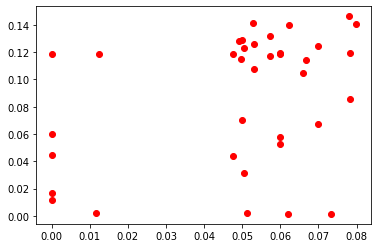

In [54]:
y_pred= df["pred growth"]
y_true= df["actual growth"]

r2=r2_score(y_true,y_pred)
print( r2)
plt.figure()
plt.plot(y_pred,y_true, 'ro')
plt.show()

-1.0084165178047813


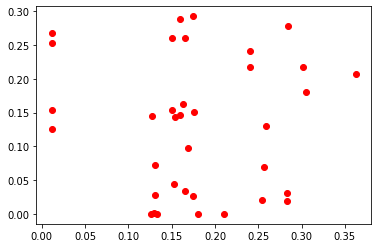

In [55]:
y_pred= df["pred thr"]
y_true= df["actual thr"]

r2=r2_score(y_true,y_pred)
print( r2)
plt.figure()
plt.plot(y_pred,y_true, 'ro')
plt.show()